In [1]:
##marketing analytics about business and understand customer, seller behaviors, product behavior and
## channel behavior etc...

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customers = pd.read_csv(r'C:\Users\jyoti rawat\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\CUSTOMERS.csv')
order_items = pd.read_csv(r'C:\Users\jyoti rawat\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_ITEMS.csv')
sellers =pd.read_csv(r'C:\Users\jyoti rawat\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\SELLERS.csv')
orders =pd.read_csv(r'C:\Users\jyoti rawat\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDERS.csv')
order_review =pd.read_csv(r'C:\Users\jyoti rawat\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_REVIEW_RATINGS.csv')
order_payments =pd.read_csv(r'C:\Users\jyoti rawat\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\ORDER_PAYMENTS.csv')
geo_location =pd.read_csv(r'C:\Users\jyoti rawat\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\GEO_LOCATION.csv')
products = pd.read_csv(r'C:\Users\jyoti rawat\Downloads\Python Foundation End to End Case Study E-Commerce Analytics Project\5. Python Foundation End to End Case Study_E-Commerce Analytics Project\PRODUCTS.csv')

In [22]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [32]:
order_payments.groupby('payment_type')['payment_installments','payment_value'].agg(['sum','mean'])

<ipython-input-32-db8efc1f2dec>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  order_payments.groupby('payment_type')['payment_installments','payment_value'].agg(['sum','mean'])


payment_installments           payment_value            
                              sum      mean           sum        mean
payment_type                                                         
UPI                         19784  1.000000  2.869361e+06  145.034435
credit_card                269332  3.507155  1.254208e+07  163.319021
debit_card                   1529  1.000000  2.179898e+05  142.570170
not_defined                     3  1.000000  0.000000e+00    0.000000
voucher                      5775  1.000000  3.794369e+05   65.703354

In [17]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,2017-10-10 21:25:00,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,2018-08-07 15:27:00,8/13/2018 0:00


In [18]:
data1 = pd.merge(customers , orders , left_on ='customer_id' , right_on ='customer_id' , how = 'left')

In [4]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'] ,errors ='coerce')

In [10]:
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'] ,errors ='coerce')

In [33]:
(orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

0         8.0
1        13.0
2         9.0
3        13.0
4         2.0
         ... 
99436     8.0
99437    22.0
99438    24.0
99439    17.0
99440     7.0
Length: 99441, dtype: float64

In [53]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh


In [54]:
merged_df = pd.merge(order_items ,sellers , on = 'seller_id' , how = 'left')

In [55]:
merged_df.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29,27277,Serilingampalle,Andhra Pradesh
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93,3471,Akkarampalle,Andhra Pradesh


In [56]:
merged_df = pd.merge(merged_df , orders , on = 'order_id' , how ='left' )

In [57]:
merged_df = pd.merge(merged_df , order_review , on = 'order_id' , how ='left' )

In [58]:
merged_df = pd.merge(merged_df , order_payments , on = 'order_id' , how ='left' )

In [59]:
merged_df = pd.merge(merged_df , products , on = 'product_id' , how ='left' )

In [60]:
merged_df = pd.merge(merged_df , customers , on = 'customer_id' , how ='left' )

In [61]:
final_data = pd.merge(merged_df , geo_location , left_on = 'customer_zip_code_prefix', right_on = 'geolocation_zip_code_prefix' , how ='left' )

In [62]:
final_data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,...,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29,27277,Serilingampalle,Andhra Pradesh,...,14.0,871766c5855e863f6eccc05f988b23cb,28013,Guntakal,Andhra Pradesh,28013.0,-21.758076,-41.312633,Guntakal,Andhra Pradesh
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93,3471,Akkarampalle,Andhra Pradesh,...,40.0,eb28e67c4c0b83846050ddfb8a35d051,15775,Kirandul,Chhattisgarh,15775.0,-20.212393,-50.941471,Kirandul,Chhattisgarh
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87,37564,Goredi Chancha,Rajasthan,...,33.0,3818d81c6709e39d06b2738a8d3a2474,35661,Kanker,Chhattisgarh,35661.0,-19.860439,-44.597972,Akkarampalle,Andhra Pradesh
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79,14403,Adilabad,Andhra Pradesh,...,15.0,af861d436cfc08b2c2ddefd0ba074622,12952,Patancheru,Andhra Pradesh,12952.0,-23.144923,-46.539830,Patancheru,Andhra Pradesh
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14,87900,Kumhari,Chhattisgarh,...,30.0,64b576fb70d441e8f1b2d7d446e483c5,13226,Changanassery,Kerala,13226.0,-23.249008,-46.824961,Changanassery,Kerala


Perform Detailed exploratory analysis
a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total
products, Total categories, Total sellers, Total locations, Total channels, Total
payment methods etc…) 


In [63]:
final_data.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'seller_zip_code_prefix', 'seller_city', 'seller_state', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'geolocation_zip_code_prefix', 'geolocation_lat',
       'geolocation_lng', 'geolocation_city', 'geolocation_state'],
      dtype='object')

In [64]:
## total revenue
final_data['total_revenue'] = final_data['price'] + final_data['freight_value']
final_data['total_revenue'].sum()

16645176.91

In [65]:
## total quantity sold
final_data['order_item_id'].count()

118318

In [66]:
##total categories
final_data['product_category_name'].nunique()

71

In [67]:
##total products
final_data['product_id'].nunique()

32951

In [68]:
##total sellers
final_data['seller_id'].nunique()

3095

In [69]:
##total locations
final_data['geolocation_state'].nunique()

20

In [70]:
##Total channels, Total payment methods 
final_data['payment_type'].nunique()

4

In [71]:
##missing values
final_data.isna().sum()

##order_delivered_customer_date  ha more missing values

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city                      1651
seller_state                     1651
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
review_id                           0
review_score                        0
review_creation_date                0
review_answer_timestamp             0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
product_category_name            1734
product_name

In [72]:
final_data.dtypes

order_id                          object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
seller_zip_code_prefix             int64
seller_city                       object
seller_state                      object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_id                         object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value   

In [73]:
## converted the datatypes 
final_data['order_purchase_timestamp'] = pd.to_datetime(final_data['order_purchase_timestamp'], errors='coerce')
final_data['order_approved_at'] = pd.to_datetime(final_data['order_approved_at'], errors='coerce')
final_data['order_delivered_carrier_date'] = pd.to_datetime(final_data['order_delivered_carrier_date'], errors='coerce')
final_data['order_delivered_customer_date'] = pd.to_datetime(final_data['order_delivered_customer_date'], errors='coerce')
final_data['order_estimated_delivery_date'] = pd.to_datetime(final_data['order_estimated_delivery_date'], errors='coerce')


b. Understanding how many new customers acquired every month

In [79]:
first_purchase = final_data.groupby('customer_id')['order_purchase_timestamp'].min()
first_purchase_month = first_purchase.dt.month
first_purchase_month.value_counts().sort_index()


1      8009
2      8427
3      9829
4      9325
5     10513
6      9377
7     10242
8     10745
9      4247
10     4876
11     7451
12     5625
Name: order_purchase_timestamp, dtype: int64

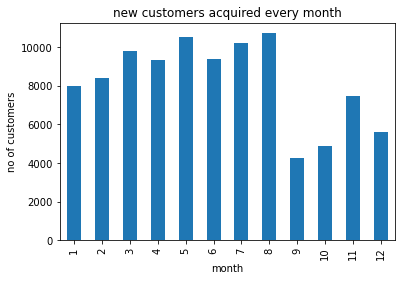

In [204]:
first_purchase_month.value_counts().sort_index().plot(kind = 'bar')
plt.xlabel('month')
plt.ylabel('no of customers')
plt.title('new customers acquired every month')
plt.show()

c. Understand the retention of customers on month on month basis

In [80]:
## Retention is determining how many customers 
##who made a purchase in a given month also made a purchase in the previous month

final_data['purchase_month'] = final_data['order_purchase_timestamp'].dt.month

first_purchase = final_data.groupby('customer_id')['purchase_month'].min()

monthly_customers = final_data.groupby('purchase_month')['customer_id'].nunique()

retention = {}

for month in monthly_customers.index:
    customers_current_month = set(final_data[final_data['purchase_month'] == month]['customer_id'])
    
    if month == 1:
        previous_month = 12  
    else:
        previous_month = month - 1
    
    previous_month_customers = set(first_purchase[first_purchase == previous_month].index)
    
   
    retained_customers = customers_current_month & previous_month_customers
    

    if len(previous_month_customers) > 0:
        retention[month] = len(retained_customers) / len(previous_month_customers) * 100
    else:
        retention[month] = 0 


retention_df = pd.Series(retention).sort_index()

print(retention_df)

## conculusion: retention rate is 0 

1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64


d. How the revenues from existing/new customers on month on month basis


In [81]:
first_purchase = final_data.groupby('customer_id')['purchase_month'].min()
revenue_by_month ={}

for month in final_data['purchase_month'].unique():
    new_customers = set(first_purchase[first_purchase == month].index)
    customers_in_month = set(final_data[final_data['purchase_month'] == month]['customer_id'])
    existing_customers = customers_in_month - new_customers
    
    new_customers_revenue = final_data[(final_data['customer_id'].isin(new_customers)) & (final_data['purchase_month'] == month)]['total_revenue'].sum()
    existing_customers_revenue = final_data[(final_data['customer_id'].isin(existing_customers)) & (final_data['purchase_month'] == month)]['total_revenue'].sum()
    revenue_by_month[month] ={'new_customers_revenue': new_customers_revenue,
        'existing_customers_revenue': existing_customers_revenue}
    

df = pd.DataFrame(revenue_by_month).T
df.index.name = 'Month'
df.sort_index(inplace = True)


In [82]:
df

,new_customers_revenue,existing_customers_revenue
Month,,
1,1306772.95,0.0
2,1342966.61,0.0
3,1668858.94,0.0
4,1650857.06,0.0
5,1827967.20,0.0
6,1606805.50,0.0
7,1729281.11,0.0
8,1744564.69,0.0
9,768312.02,0.0


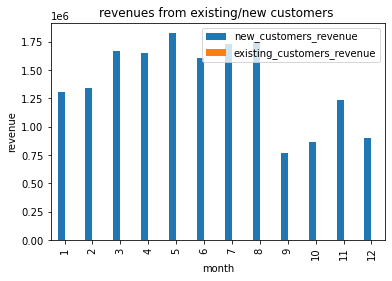

In [83]:
df.plot(kind = 'bar' , y =[ 'new_customers_revenue','existing_customers_revenue'])
plt.xlabel('month')
plt.ylabel('revenue')
plt.title('revenues from existing/new customers ')
plt.show()

e. Understand the trends/seasonality of sales, quantity by category, location, month,
week, day, time, channel, payment method etc…


In [84]:
final_data['purchase_week'] = final_data['order_purchase_timestamp'].dt.to_period('W')
final_data['purchase_day'] = final_data['order_purchase_timestamp'].dt.day_name()
final_data['purchase_time'] = final_data['order_purchase_timestamp'].dt.hour


In [85]:
## timebased analysis
##monthly sales

monthly_sales = final_data.groupby('purchase_month')['total_revenue'].sum()
monthly_quantity_sold = final_data.groupby('purchase_month')['order_item_id'].count()

##weekely sales
weekely_sales = final_data.groupby('purchase_week')['total_revenue'].sum()
weekely_quantity_sold = final_data.groupby('purchase_week')['order_item_id'].count()

daily_sales = final_data.groupby('purchase_day')['total_revenue'].sum()

hourly_sales =final_data.groupby('purchase_time')['total_revenue'].sum()



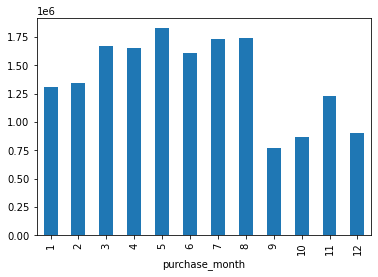

In [86]:
monthly_sales = final_data.groupby('purchase_month')['total_revenue'].sum().plot(kind= 'bar')


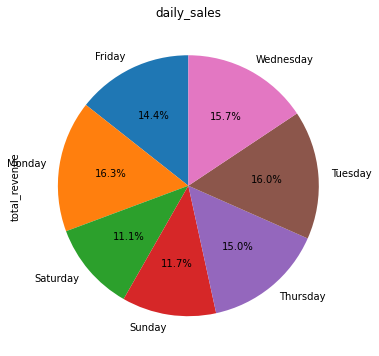

In [87]:
final_data.groupby('purchase_day')['total_revenue'].sum().plot(kind ='pie' , figsize =(10,6) , autopct='%1.1f%%' , startangle=90)
plt.title('daily_sales')
plt.show()


In [88]:
##product category sales
category_sales = final_data.groupby('product_category_name')['total_revenue'].sum()
category_quantity_sold = final_data.groupby('product_category_name')['order_item_id'].count()

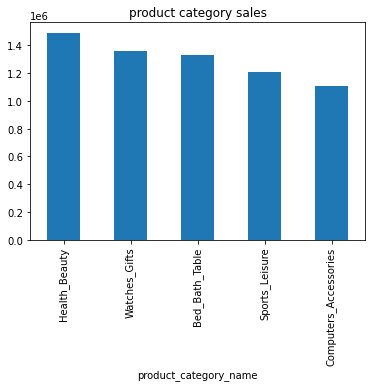

In [89]:
final_data.groupby('product_category_name')['total_revenue'].sum().sort_values(ascending = False).head(5).plot(kind = 'bar')
plt.title('product category sales')
plt.show()

In [90]:
##location wise sales
location_sales = final_data.groupby('seller_state')['total_revenue'].sum()
location_quantity_sold = final_data.groupby('seller_state')['order_item_id'].count()

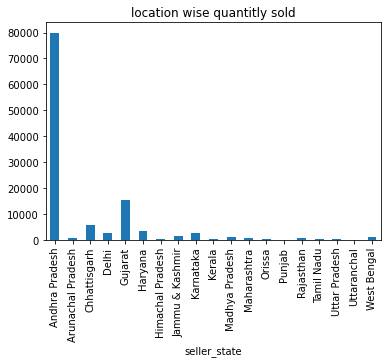

In [91]:
final_data.groupby('seller_state')['order_item_id'].count().plot(kind = 'bar')
plt.title('location wise quantitly sold')
plt.show()

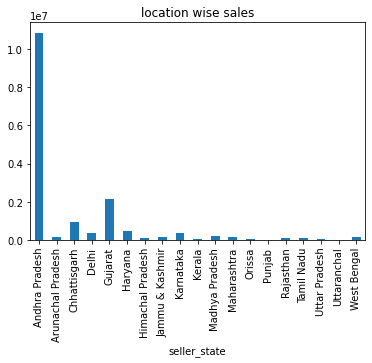

In [92]:
final_data.groupby('seller_state')['total_revenue'].sum().plot(kind='bar')
plt.title('location wise sales')
plt.show()

In [93]:
##channel wise

channelwise_sales = final_data.groupby('payment_type')['total_revenue'].sum()

f. Popular Products by month, seller, state, category.

In [95]:
##popular products by month
popular_products = final_data.groupby(['purchase_month','product_id'])['order_id'].nunique().reset_index()
popular_products = popular_products.sort_values(by = ['purchase_month','order_id'], ascending=[True, False])
popular_products.sort_values(by = ['purchase_month','order_id'], ascending=[True, False], inplace=True)
popular_products


,purchase_month,product_id,order_id
3087,1,aca2eb7d00ea1a7b8ebd4e68314663af,107
1489,1,54d9ac713e253fa1fae9c8003b011c2a,76
960,1,36f60d45225e60c7da4558b070ce4b60,47
1613,1,5a848e4ab52fd5445cdc07aab1c40e48,42
3767,1,d1c427060a0f73f6b889a5c7c61f2ac4,39
...,...,...,...
60790,12,ffbc83054b3741a8d67fc59d9cf9d42d,1
60791,12,ffc0b406806006602c5853b00ab5f7fd,1
60792,12,ffce5ed9e0bcc2e46796b988cdac733b,1
60793,12,ffcfaba393e8ef71937c6e8421bc2868,1


In [96]:
##popular product by seller
popular_products = final_data.groupby(['seller_id','product_id'])['order_id'].nunique().reset_index()
popular_products.sort_values(by = ['order_id'], ascending=False)

,seller_id,product_id,order_id
9881,4a3ca9315b744ce9f8e9374361493884,99a4788cb24856965c36a24e339b6058,461
21025,955fee9216a65b617aa5c0531780ce60,aca2eb7d00ea1a7b8ebd4e68314663af,431
4645,1f50f920176fa81dab994f9023523100,422879e10f46682990de24d770e7f83d,352
22211,a1043bafd471dff536d0c462352beb48,d1c427060a0f73f6b889a5c7c61f2ac4,323
4643,1f50f920176fa81dab994f9023523100,389d119b48cf3043d311335e499d9c6b,311
...,...,...,...
14345,6b3bd31ad8fcda4b2635ec9f3ff2ecdf,765a8070ece0f1383d0f5faf913dfb9b,1
14344,6b3bd31ad8fcda4b2635ec9f3ff2ecdf,72a30483855e2eafc67aee5dc2560482,1
14343,6b3bd31ad8fcda4b2635ec9f3ff2ecdf,712c57780310856377c327e662653625,1
14340,6b3bd31ad8fcda4b2635ec9f3ff2ecdf,516c257eda161040c8d23cf8af9a6edb,1


In [112]:
##popular product by state
popular_products = final_data.groupby(['seller_state','product_id'])['order_id'].nunique().reset_index()
popular_products.sort_values(by = ['order_id'], ascending=False)

,seller_state,product_id,order_id
27206,Gujarat,99a4788cb24856965c36a24e339b6058,467
14387,Andhra Pradesh,aca2eb7d00ea1a7b8ebd4e68314663af,431
5590,Andhra Pradesh,422879e10f46682990de24d770e7f83d,352
32952,West Bengal,d1c427060a0f73f6b889a5c7c61f2ac4,323
4758,Andhra Pradesh,389d119b48cf3043d311335e499d9c6b,311
...,...,...,...
13830,Andhra Pradesh,a5d89252158ff2fc7effe07dcffbbc14,1
13827,Andhra Pradesh,a5d39bdbd8f8873a55299222206fd522,1
13826,Andhra Pradesh,a5d22340ec8e3ee661b5f00e64bd3ee7,1
13825,Andhra Pradesh,a5cd90e0939b756beb465c31ec689e58,1


In [109]:
##popular product by category
popular_products = final_data.groupby(['product_id','product_category_name'])['order_id'].nunique().reset_index()
popular_products.sort_values(by = ['order_id'], ascending=False)

,product_id,product_category_name,order_id
19387,99a4788cb24856965c36a24e339b6058,Bed_Bath_Table,467
21716,aca2eb7d00ea1a7b8ebd4e68314663af,Furniture_Decor,431
8453,422879e10f46682990de24d770e7f83d,Garden_Tools,352
26533,d1c427060a0f73f6b889a5c7c61f2ac4,Computers_Accessories,323
7228,389d119b48cf3043d311335e499d9c6b,Garden_Tools,311
...,...,...,...
13452,69eeb1281add8e5d8b916637f9f11a1b,Bed_Bath_Table,1
13451,69e8f74916646e186145f5648840ea9e,Garden_Tools,1
13450,69e4611a0bf0f672e3a83b719cdb76ab,Telephony,1
13449,69e3a7b303638194dc5edd5e6abff8ff,Fashion_Shoes,1


g.Popular categories by state, month

In [118]:
##popular cateogies by state
final_data.groupby(['seller_state' , 'product_category_name'])['order_id'].nunique().reset_index().sort_values(by = 'order_id' , ascending = False)

,seller_state,product_category_name,order_id
42,Andhra Pradesh,Health_Beauty,6986
202,Gujarat,Bed_Bath_Table,5412
14,Andhra Pradesh,Computers_Accessories,5329
63,Andhra Pradesh,Sports_Leisure,4571
68,Andhra Pradesh,Watches_Gifts,4246
...,...,...,...
260,Haryana,Christmas_Supplies,1
467,Maharashtra,Food_Drink,1
45,Andhra Pradesh,Home_Comfort_2,1
264,Haryana,Construction_Tools_Lights,1


In [119]:
##popular product by month
final_data.groupby(['purchase_month' , 'product_category_name'])['order_id'].nunique().reset_index().sort_values(by = 'order_id' , ascending = False)

,purchase_month,product_category_name,order_id
513,8,Health_Beauty,1123
376,6,Health_Beauty,1038
409,7,Bed_Bath_Table,1031
478,8,Bed_Bath_Table,1006
342,6,Bed_Bath_Table,992
...,...,...,...
656,10,Music,1
632,10,Fashion_Childrens_Clothes,1
769,12,Furniture_Bedroom,1
202,4,Arts_And_Craftmanship,1


h. List top 10 most expensive products sorted by price

In [126]:
final_data[['product_id','price']].sort_values(by = 'price' , ascending = False).head(10)

,product_id,price
3691,489ae2aa008f021502940f251d4cce7f,6735.00
117875,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
113227,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
78145,a6492cc69376c469ab6f61d8f44de961,4799.00
11787,c3ed642d592594bb648ff4a04cee2747,4690.00
65346,259037a6a41845e455183f89c5035f18,4590.00
30740,a1beef8f3992dbd4cd8726796aa69c53,4399.87
48298,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
82309,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
62210,6902c1962dd19d540807d0ab8fade5c6,3999.90


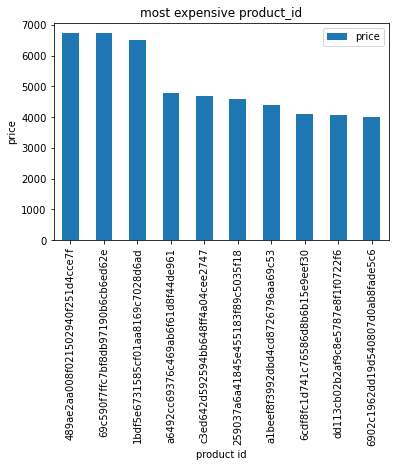

In [202]:
final_data[['product_id','price']].sort_values(by = 'price' , ascending = False).head(10).plot(kind='bar', x = 'product_id')
plt.title('most expensive product_id')
plt.xlabel('product id')
plt.ylabel('price')
plt.show()

2. Performing Customers/sellers Segmentation
a. Divide the customers into groups based on the revenue generated
b. Divide the sellers into groups based on the revenue generated 

In [97]:
##customer segmentation
customer_revenue = final_data.groupby('customer_id')['total_revenue'].sum().reset_index()
customer_revenue['customer_segmentation'] = pd.cut(customer_revenue.total_revenue , bins = 4 , labels = ['low','medium','high','very high'])
customer_revenue

,customer_id,total_revenue,customer_segmentation
0,00012a2ce6f8dcda20d059ce98491703,114.74,low
1,000161a058600d5901f007fab4c27140,67.41,low
2,0001fd6190edaaf884bcaf3d49edf079,195.42,low
3,0002414f95344307404f0ace7a26f1d5,179.35,low
4,000379cdec625522490c315e70c7a9fb,107.01,low
...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,91.91,low
98662,fffecc9f79fd8c764f843e9951b11341,244.08,low
98663,fffeda5b6d849fbd39689bb92087f431,63.13,low
98664,ffff42319e9b2d713724ae527742af25,214.13,low


In [98]:
##seller segmentation

seller_revenue = final_data.groupby('seller_id')['total_revenue'].sum().reset_index()
seller_revenue['seller_segmentation'] = pd.cut(seller_revenue.total_revenue , bins = 4 , labels = ['low','medium','high','very high'])
seller_revenue

,seller_id,total_revenue,seller_segmentation
0,0015a82c2db000af6aaaf3ae2ecb0532,2748.06,low
1,001cca7ae9ae17fb1caed9dfb1094831,34175.38,low
2,001e6ad469a905060d959994f1b41e4f,267.94,low
3,002100f778ceb8431b7a1020ff7ab48f,2141.41,low
4,003554e2dce176b5555353e4f3555ac8,139.38,low
...,...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,79.52,low
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,2884.73,low
3092,ffeee66ac5d5a62fe688b9d26f83f534,2259.55,low
3093,fffd5413c0700ac820c7069d66d98c89,12277.04,low


3. Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in
each transaction. (combination of 2 or 3 buying together)


In [100]:
##each order will have a list of products that were purchased together in that particular order.
## _ used to ignore the index
transactions_product_list = final_data.groupby('order_id')['product_id'].apply(list).reset_index()

from itertools import combinations

combination_2 =[]
combination_3 = []

for _, row in transactions_product_list.iterrows():
    products_order = row ['product_id']
    combination_2.extend(combinations(products_order,2))
    combination_3.extend(combinations(products_order,3))
    
    
df1 = pd.DataFrame(combination_2 , columns = ['product1','product2'])
df2 = pd.DataFrame(combination_3 , columns = ['product1','product2' ,'product3'])

count1 = df1.groupby(['product1','product2']).size().reset_index(name = 'count').sort_values(by = 'count' , ascending = False).head(10)
count2 = df2.groupby(['product1','product2' ,'product3']).size().reset_index(name = 'count').sort_values(by = 'count' ,ascending = False).head(10)

    

In [101]:
count1

,product1,product2,count
10138,ebf9bc6cd600eadd681384e3116fda85,5ddab10d5e0a23acb99acf56b62b3276,882
10139,ebf9bc6cd600eadd681384e3116fda85,ebf9bc6cd600eadd681384e3116fda85,862
222,0554911df28fda9fd668ce5ba5949695,0554911df28fda9fd668ce5ba5949695,703
1213,1aecdb5fa3add74e385f25c6c527a462,1aecdb5fa3add74e385f25c6c527a462,406
2898,422879e10f46682990de24d770e7f83d,422879e10f46682990de24d770e7f83d,326
6069,8d37ee446981d3790967d0268d6cfc81,8d37ee446981d3790967d0268d6cfc81,325
10263,eea3e07f864a0a1389726d8a5f31c3f6,eea3e07f864a0a1389726d8a5f31c3f6,276
175,0449db5eede617c5fd413071d582f038,0449db5eede617c5fd413071d582f038,276
788,11250b0d4b709fee92441c5f34122aed,11250b0d4b709fee92441c5f34122aed,276
3430,4e53a453045707bbc5febcf5f32097ac,4e53a453045707bbc5febcf5f32097ac,276


4. Payment Behaviour
a. How customers are paying?
b. Which payment channels are used by most customers?

In [171]:
final_data.groupby('payment_type')['customer_id'].nunique()

payment_type
UPI            19614
credit_card    75991
debit_card      1521
voucher         3766
Name: customer_id, dtype: int64

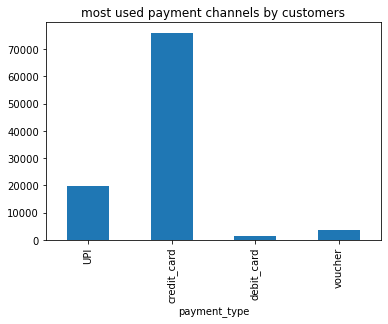

In [241]:
final_data.groupby('payment_type')['customer_id'].nunique().plot(kind = 'bar')
plt.title('most used payment channels by customers')
plt.show()

In [169]:
##how customers are paying
final_data['payment_type'].value_counts()

credit_card    87266
UPI            23018
voucher         6332
debit_card      1699
Name: payment_type, dtype: int64

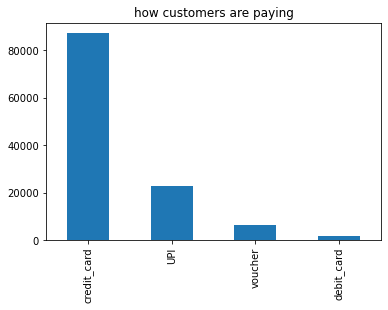

In [197]:
final_data['payment_type'].value_counts().plot(kind ='bar')
plt.title('how customers are paying')
plt.show()

5. Customer satisfaction towards category & product
a. Which categories (top 10) are maximum rated & minimum rated?
b. Which products (top10) are maximum rated & minimum rated?
c. Average rating by location, seller, product, category, month etc.

In [177]:
final_data.groupby('product_category_name')['review_score'].mean().reset_index().sort_values(by = 'review_score' , ascending = False).head(10)

,product_category_name,review_score
11,Cds_Dvds_Musicals,4.642857
29,Fashion_Childrens_Clothes,4.500000
8,Books_General_Interest,4.431858
9,Books_Imported,4.419355
10,Books_Technical,4.345588
22,Costruction_Tools_Tools,4.333333
64,Small_Appliances_Home_Oven_And_Coffee,4.320513
37,Food_Drink,4.312715
53,Luggage_Accessories,4.290628
32,Fashion_Sport,4.258065


In [178]:
final_data.groupby('product_category_name')['review_score'].mean().reset_index().sort_values(by = 'review_score' , ascending = False).tail(10)

,product_category_name,review_score
19,Construction_Tools_Safety,3.834171
4,Audio,3.824147
41,Furniture_Mattress_And_Upholstery,3.804878
27,Fashio_Female_Clothing,3.780000
34,Fixed_Telephony,3.661765
30,Fashion_Male_Clothing,3.531034
57,Office_Furniture,3.516779
46,Home_Comfort_2,3.387097
23,Diapers_And_Hygiene,3.256410
61,Security_And_Services,2.500000


In [179]:
final_data.groupby('product_id')['review_score'].mean().reset_index().sort_values(by = 'review_score' , ascending = False).head(10)

,product_id,review_score
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
17330,86743ff92eee3d16b7df59cddd583b8c,5.0
17345,868ceb027ab706a4dee42e2220006b85,5.0
17343,868969d3a93aeeab7bfcd4fc3d3d65de,5.0
17342,868766ed2172644fdd977d6bd395a107,5.0
17340,8684bd8f93b4f4038d07188a23811e93,5.0
17335,867c96d2bb67aba6500a4c509cf76072,5.0
17334,867b820367ec206b38a357f2c12454b7,5.0
17333,867901d7e8488fb97f1fb538c09d476e,5.0
17325,865bfa00c1dad8f4146d3c2765f051ca,5.0


In [180]:
final_data.groupby('product_id')['review_score'].mean().reset_index().sort_values(by = 'review_score' , ascending = False).tail(10)

,product_id,review_score
5798,2c14830d33060649974768f49b7abd89,1.0
8155,3ea7e516d573a0445abc7cab48949be0,1.0
29029,e15014500e7941bc3fae1757c3cd48ad,1.0
13628,6947c3397dae24c49aa4b34b68bf3b09,1.0
13627,69474edea9d9def8b68de248373f1ad4,1.0
19122,94f8c822a2c9d476088ac45227f8226c,1.0
13623,69428fb5c0da1fac708bdb33868b42d8,1.0
13621,693e8a3550dfe12cd2a3f2a3f01b6130,1.0
29036,e15f2eb4bd9c94996e56cc76c1394361,1.0
9831,4bae12e58c9b828e1302a2cad437b80a,1.0


c. Average rating by location, seller, product, category, month etc.

In [256]:
##average rating by location
final_data.groupby('customer_state')['review_score'].mean()

customer_state
Andhra Pradesh       3.995151
Arunachal Pradesh    4.024242
Chhattisgarh         4.031524
Delhi                4.029000
Goa                  4.800000
Gujarat              4.037570
Haryana              4.117066
Himachal Pradesh     3.988399
Jammu & Kashmir      3.998362
Karnataka            4.015122
Kerala               4.051685
Madhya Pradesh       3.996443
Maharashtra          4.093023
Orissa               4.087393
Punjab               4.166882
Rajasthan            4.098592
Tamil Nadu           4.112464
Uttar Pradesh        4.132203
Uttaranchal          3.718182
West Bengal          4.002342
Name: review_score, dtype: float64

In [257]:
##average rating by seller
final_data.groupby('seller_id')['review_score'].mean()



seller_id
0015a82c2db000af6aaaf3ae2ecb0532    3.666667
001cca7ae9ae17fb1caed9dfb1094831    3.883817
001e6ad469a905060d959994f1b41e4f    1.000000
002100f778ceb8431b7a1020ff7ab48f    4.033898
003554e2dce176b5555353e4f3555ac8    5.000000
                                      ...   
ffcfefa19b08742c5d315f2791395ee5    1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3    4.285714
ffeee66ac5d5a62fe688b9d26f83f534    4.214286
fffd5413c0700ac820c7069d66d98c89    3.838710
ffff564a4f9085cd26170f4732393726    2.100000
Name: review_score, Length: 3095, dtype: float64

In [259]:
##average rating by month
final_data.groupby('purchase_month')['review_score'].mean()


purchase_month
1     3.943279
2     3.788968
3     3.781311
4     4.036545
5     4.118807
6     4.156802
7     4.169240
8     4.204288
9     4.121306
10    4.011661
11    3.825638
12    3.927987
Name: review_score, dtype: float64

##insights
1. retention rate is 0 . every month you are acquiring new customers. that is good but retention rate should be not 0. 
2. most of the revenue generrated and quantities are sold in andhra pradesh and gujarat
3.most of the customers are paying through credit cards
4. generated 1.66 cr revenue
5. most of the sales are in summer season
6.more revenue generated on monday , tues rather than sat ,sum you have low revenue
7.top 5 revenue generated product categories - Health_Beauty ,Watches_Gifts ,Bed_Bath_Table ,Sports_Leisure ,Computers_Accessories 
8.andhra pradesh have good revenue generation but the reviews are ok ok.
9.(ebf9bc6cd600eadd681384e3116fda85 , 5ddab10d5e0a23acb99acf56b62b3276)these products have great combination
(ebf9bc6cd600eadd681384e3116fda85 , ebf9bc6cd600eadd681384e3116fda85)
(0554911df28fda9fd668ce5ba5949695 , 0554911df28fda9fd668ce5ba5949695)